In [4]:
import tensorflow as tf

In [6]:
#Load in Data
from sklearn.datasets import load_breast_cancer

In [8]:
data = load_breast_cancer()

In [ ]:
data

In [11]:
type(data)

sklearn.utils.Bunch

In [13]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [14]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [16]:
data.target.shape

(569,)

In [17]:
from sklearn.model_selection import train_test_split

X_train , X_test, Y_train, Y_test = train_test_split(
    data.data, data.target, test_size=0.33
)

In [19]:
 N, D = X_train.shape

In [20]:
N

381

In [21]:
D

30

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(D,), activation='sigmoid'))

In [29]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

In [31]:
print("train score:", model.evaluate(X_train, Y_train))

12/12 [==============================] - 0s 2ms/step - loss: 0.0765 - accuracy: 0.9843
train score: [0.07653279602527618, 0.9842519760131836]


In [32]:
import matplotlib.pyplot as plt

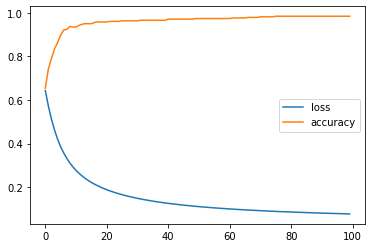

In [35]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.legend()